<a href="https://colab.research.google.com/github/maheshgouda11/Indian-Unicorn-Data-Analysis/blob/main/DAVPROJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Indian Unicorn startups 2023**

Dataset-Venture Intelligence Unicorn Tracker

In [19]:
import pandas as pd
df=pd.read_csv("/content/Indian Unicorn startups 2023 updated.csv")
df

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.00,1.00,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.00,37.60,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.00,1.50,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.80,2.40,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.70,16.00,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."
...,...,...,...,...,...,...,...,...
97,98,Purplle,E-Commerce - Personal Care & Cosmetics,1.10,1.10,Jun/2022,Mumbai,"JSW Ventures, IvyCap Ventures, Blume Ventures,..."
98,99,Leadsquared,SaaS - CRM,1.00,1.00,Jun/2022,Bangalore,"Stakeboat Capital, Gaja Capital, WestBridge"
99,100,OneCard,Fintech - Credit Cards,1.30,1.30,Jul/2022,Pune,"QED Investors, Matrix Partners India, Sequoia ..."
100,101,Shiprocket,Aggregator - Logistics Services,1.23,1.23,Aug/2022,Delhi,"Lightrock India, Info Edge, Tribe Capital, Tem..."


In [20]:
#data cleaning using above dataset

# Check for missing values
df.isnull().sum()

# Drop rows with missing values
df = df.dropna()

# Check for duplicate rows
df.duplicated().sum()

# Drop duplicate rows
df = df.drop_duplicates()

# Check for incorrect data types
df.dtypes

# Convert data types if necessary
df['Entry'] = pd.to_datetime(df['Entry'])

# Check for outliers
df.describe()


<ipython-input-20-25ca876861c2>:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Entry'] = pd.to_datetime(df['Entry'])


,No.,Entry Valuation^^ ($B),Valuation ($B),Entry
count,102.000000,102.000000,102.000000,102
mean,51.500000,1.547549,3.398020,2020-06-19 11:45:52.941176576
min,1.000000,1.000000,0.568000,2011-09-01 00:00:00
25%,26.250000,1.000000,1.200000,2019-07-16 12:00:00
50%,51.500000,1.200000,1.850000,2021-05-01 00:00:00
75%,76.750000,1.582500,3.475000,2021-11-01 00:00:00
max,102.000000,10.000000,37.600000,2022-09-01 00:00:00
std,29.588849,1.138013,4.710657,NaN


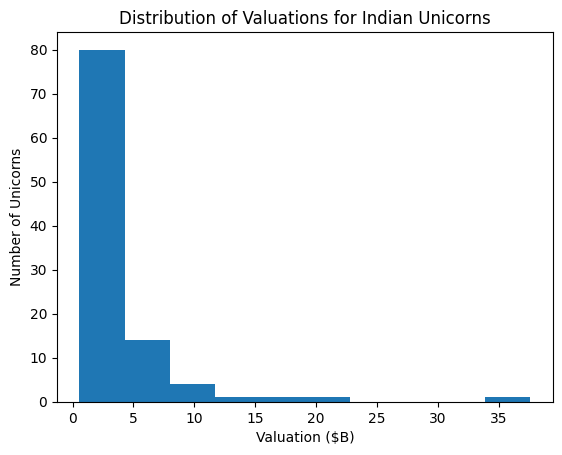

In [21]:
# visulization

import matplotlib.pyplot as plt


# Plot the distribution of valuations
plt.hist(df['Valuation ($B)'], bins=10)
plt.xlabel('Valuation ($B)')
plt.ylabel('Number of Unicorns')
plt.title('Distribution of Valuations for Indian Unicorns')
plt.show()




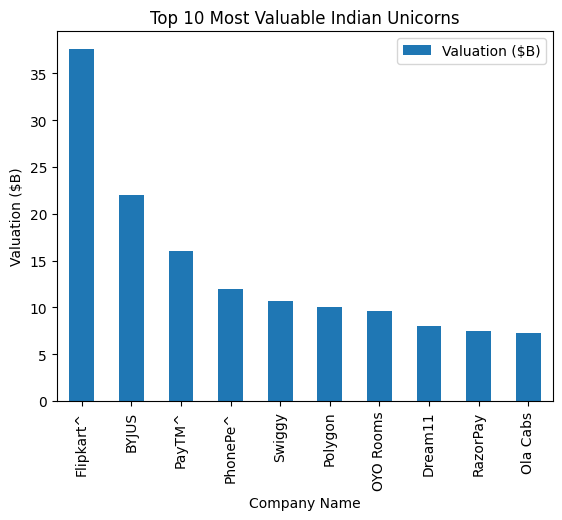

In [22]:
# Plot the top 10 most valuable unicorns
df.sort_values(by='Valuation ($B)', ascending=False).head(10).plot.bar(x='Company', y='Valuation ($B)')
plt.xlabel('Company Name')
plt.ylabel('Valuation ($B)')
plt.title('Top 10 Most Valuable Indian Unicorns')
plt.show()

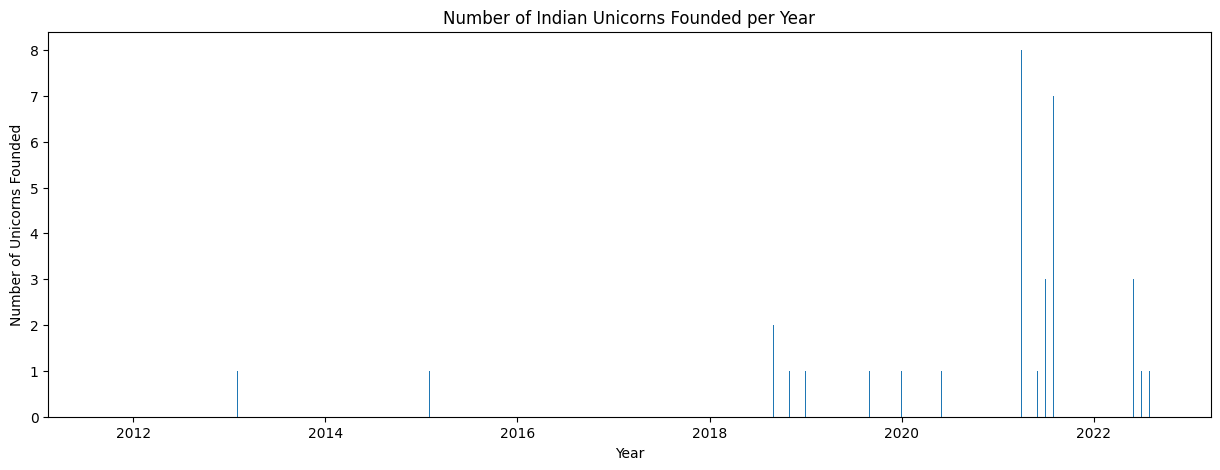

In [23]:
# Plot the number of unicorns founded per year
plt.figure(figsize=(15,5))
x = df['Entry'].value_counts().sort_values(ascending = False)
plt.bar(x.index,x)
plt.xlabel('Year')
plt.ylabel('Number of Unicorns Founded')
plt.title('Number of Indian Unicorns Founded per Year')
plt.show()


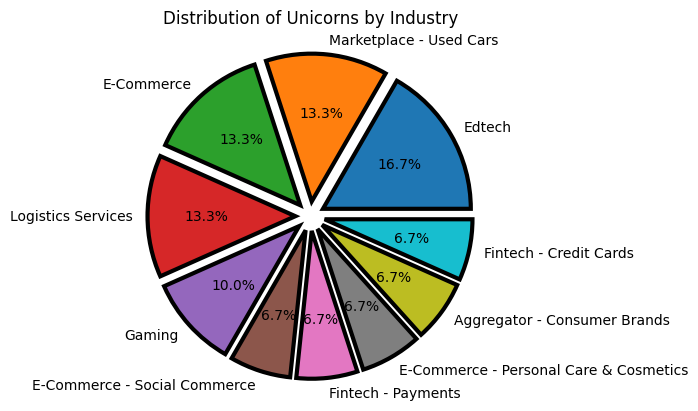

In [24]:
# Create a pie chart of the industries with the most unicorns
industry_counts = df['Sector'].value_counts().head(10).sort_values(ascending = False)
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1)
plt.pie(industry_counts, autopct='%1.1f%%',labels=industry_counts.index,
        shadow=False,
        explode=explode,
        wedgeprops= {"edgecolor":"black",
                     'linewidth': 3,
                     'antialiased': True})
plt.title('Distribution of Unicorns by Industry')
plt.show()


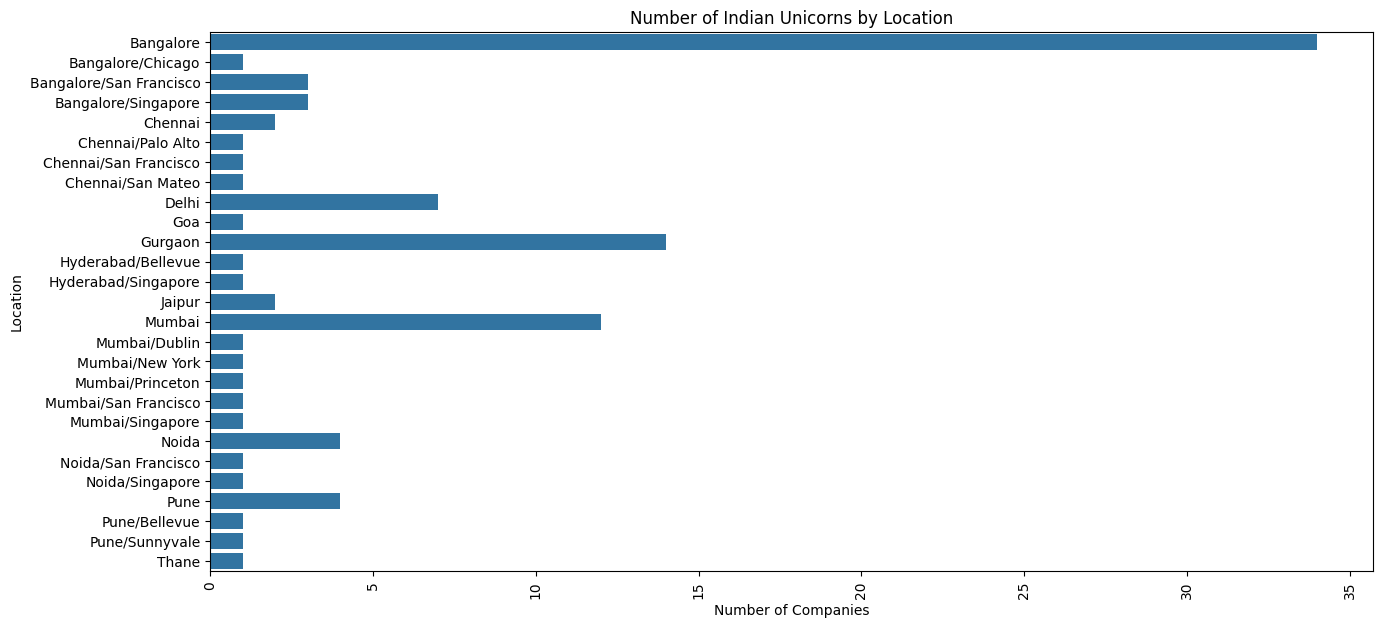

In [25]:

import seaborn as sns

# Create a new DataFrame with the desired columns
df_location_count = df.groupby('Location')['Company'].count().reset_index(name='Number of Companies')

plt.figure(figsize=(15,7))
# Create the Seaborn plot
sns.barplot(x='Number of Companies', y='Location', data=df_location_count)

# Rotate the x-axis labels to be vertical
plt.xticks(rotation=90)

# Add a title and axis labels
plt.title('Number of Indian Unicorns by Location')
plt.xlabel('Number of Companies')
plt.ylabel('Location')

# Show the plot
plt.show()


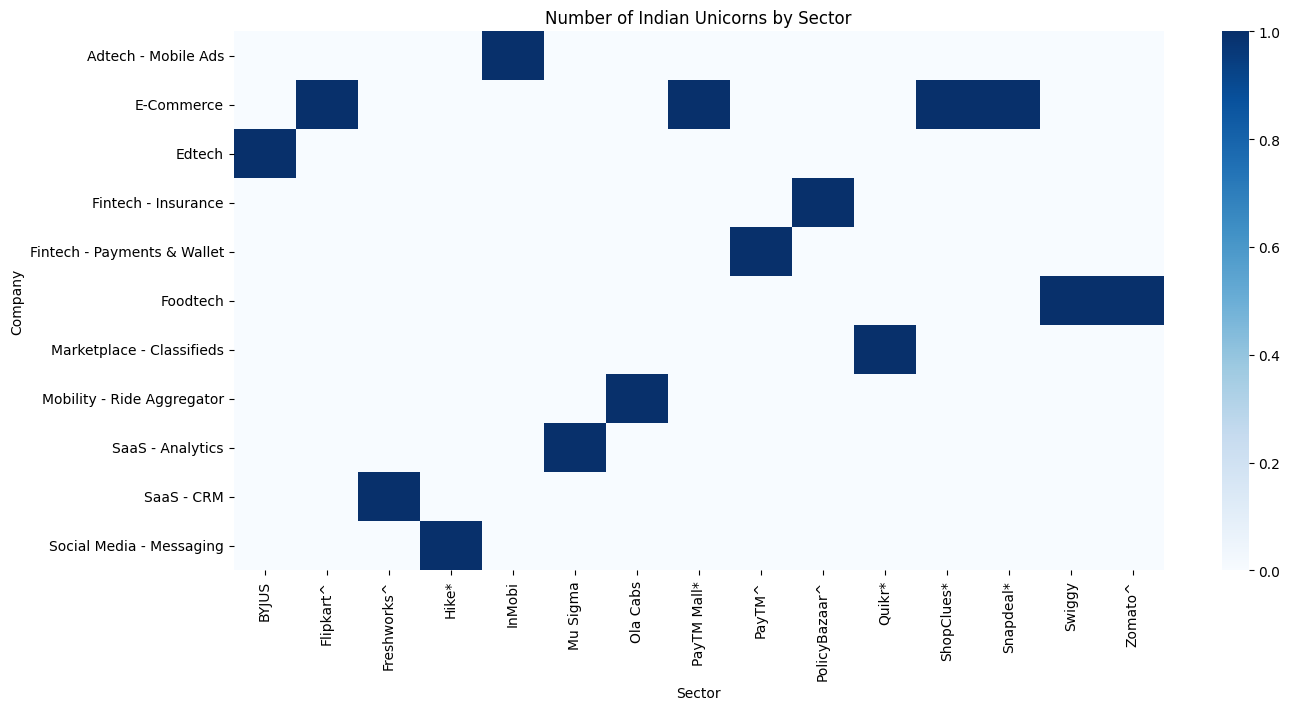

In [26]:
# heat map

import seaborn as sns

# Create a crosstab of sector vs number of companies
sector_counts = pd.crosstab(df['Sector'].head(15), df['Company'].head(15))
plt.figure(figsize=(15,7))
# Create a heatmap of the crosstab
sns.heatmap(sector_counts, annot=False, cmap='Blues')

# Add a title and axis labels
plt.title('Number of Indian Unicorns by Sector')
plt.xlabel('Sector')
plt.ylabel('Company')

# Show the heatmap
plt.show()


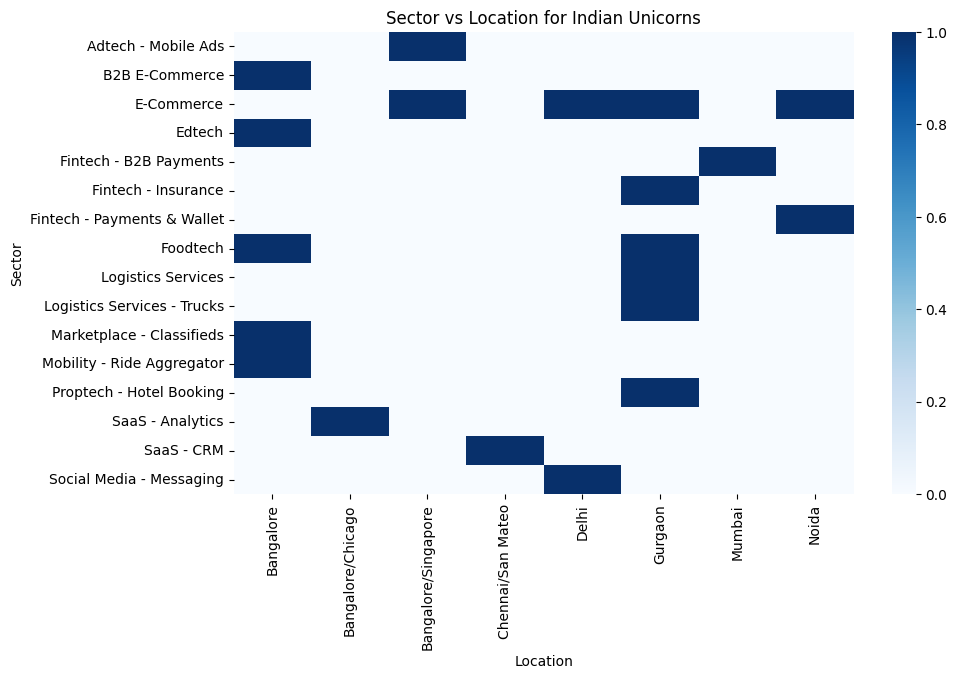

In [27]:
# sector vs location

import matplotlib.pyplot as plt

# Create a crosstab of sector vs location
sector_location_crosstab = pd.crosstab(df['Sector'].head(20), df['Location'].head(20))

# Plot the crosstab as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(sector_location_crosstab, annot=False, fmt='d', cmap='Blues')
plt.xlabel('Location')
plt.ylabel('Sector')
plt.title('Sector vs Location for Indian Unicorns')
plt.show()


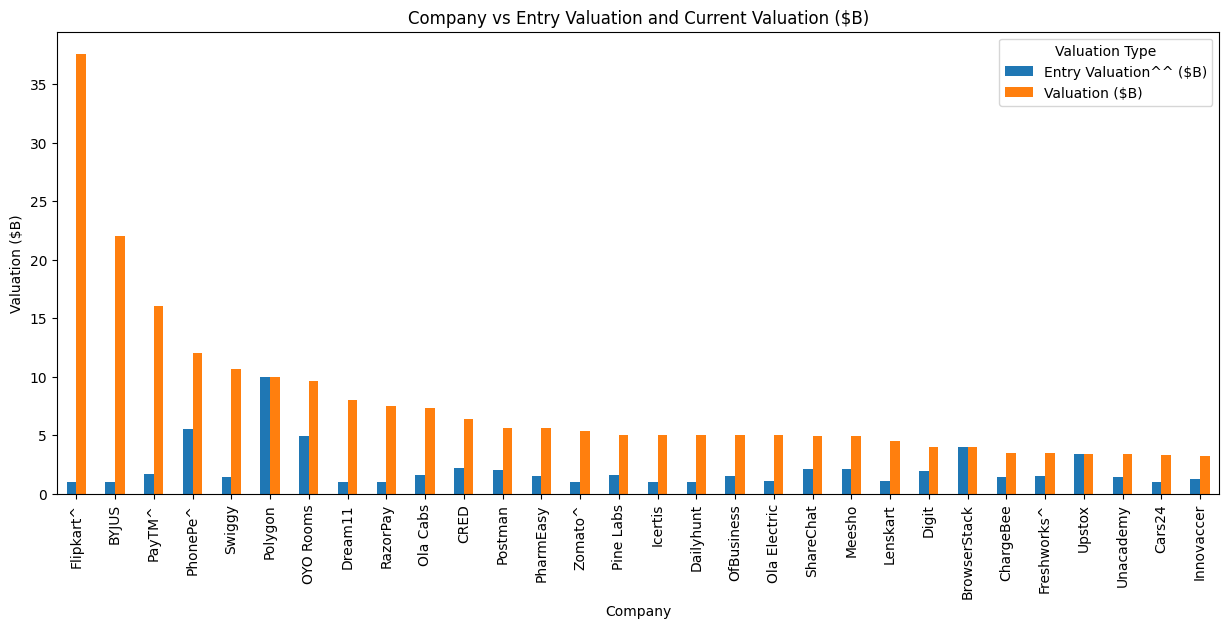

In [28]:
# plot company vs Entry Valuation ($B)	and Valuation ($B)

df_plot = df[['Company', 'Entry Valuation^^ ($B)', 'Valuation ($B)']].sort_values(by='Valuation ($B)',ascending = False).head(30)

# Create a bar chart with two side-by-side bars for each company
df_plot.plot.bar(x='Company', y=['Entry Valuation^^ ($B)', 'Valuation ($B)'], title='Company vs Entry Valuation and Current Valuation ($B)', figsize=(15, 6))

# Add labels and legend
plt.xlabel('Company')
plt.ylabel('Valuation ($B)')
plt.legend(title='Valuation Type')
plt.xticks(rotation=90)
plt.show()


InMobiFlipkart^Mu SigmaSnapdeal*PayTM^Ola CabsQuikr*Zomato^ShopClues*Hike*BYJUSPayTM Mall*SwiggyPolicyBazaar^Freshworks^OYO RoomsUdaanBillDeskDelhivery^RivigoBigBasketDream11Druva SoftwareIcertisCitiusTechOla ElectricLenskartPine LabsNykaa^PostmanUnacademyRazorPayCars24PhonePe^ZenotiDailyhuntGlance InMobiDigitInnovaccerInfra.MarketFive Star Business Finance^FirstCryMeeshoCREDPharmEasyGrowwShareChatGupshupChargeBeeUrban CompanyMoglixZetaBrowserStackBlackBuckDroomOfBusinessBharatPeMindTickleupGradCoinDCXEruditusBlinkit^ZetwerkMobile Premier LeagueApna.coVedantuLiciousCoinSwitchRebel FoodsCardekhoAckoMyGlammCureFitMensa BrandsNoBrokerSpinnyUpstoxSlicePristyn CareMamaearthGlobalBeesFractalLEAD SchoolDarwinBoxDealSharePolygonElasticRunLivSpaceXpressBees LogisticsUniphore Software SystemsHasuraCredAvenueAmagi Media LabsOxyzo Financial ServicesGames24x7Open Financial TechnologiesPhysicsWallahPurplleLeadsquaredOneCardShiprocketMolbio Diagnostics


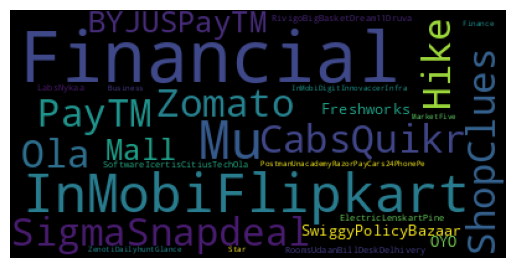

In [29]:
from wordcloud import WordCloud

text="".join(item for item in df['Company'])
print(text)
wc=WordCloud(background_color="black").generate(text)
plt.imshow(wc)
plt.axis("off")
plt.margins(x=0,y=0)
plt.show()

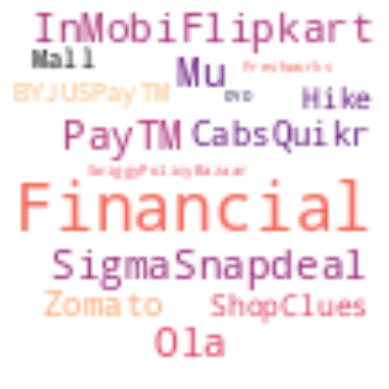

In [30]:
wordcloud = WordCloud(background_color="white",max_words=100,max_font_size=100,height=100,width=100,colormap="magma").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

The outcome of the above project is a comprehensive analysis of Indian unicorn startups based on the provided dataset. The analysis includes:


1.   **Data cleaning:**
2. **Exploratory data analysis:**

**Conclusions:**
    
1.   The analysis provides insights into the growth of the Indian unicorn startup ecosystem, the distribution of valuations, the most valuable unicorns, the industries with the most unicorns, and the locations with the most unicorns.
2.  The analysis also provides insights into the relationship between sector and location for Indian unicorns.
3.  The analysis can be used by investors, entrepreneurs, and policymakers to better understand the Indian unicorn startup ecosystem and make informed decisions.



    

In addition to the above, the project also demonstrates how to use Python libraries such as pandas, matplotlib, and seaborn to analyze and visualize data.